In [1]:
# imports
%matplotlib inline
from collections import Counter
import re
import nltk
from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)
from nltk.corpus import stopwords
import os
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from tqdm import tqdm_notebook
import scipy.stats as sstats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
import string
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import datasets
stop_words = set(stopwords.words('english'))
sns.set_style('whitegrid')

# Dataset analysis

In [2]:
airline = pd.read_csv('Tweets.csv')
airlines = airline.airline.unique()
for e in airlines:
    print(airline[airline['airline'] == e]['text'])
airline = airline[['text', 'airline_sentiment']]
airlines = ['VirginAmerica','united','SouthwestAir','JetBlue','USAirways','AmericanAir']
airline.head()

0                    @VirginAmerica What @dhepburn said.
1      @VirginAmerica plus you've added commercials t...
2      @VirginAmerica I didn't today... Must mean I n...
3      @VirginAmerica it's really aggressive to blast...
4      @VirginAmerica and it's a really big bad thing...
                             ...                        
499    @VirginAmerica morning. If I have a question r...
500    @VirginAmerica still waiting to see  @Starryey...
501    @VirginAmerica was wondering if you guys recie...
502    @VirginAmerica Flying LAX to SFO and after loo...
503    “@VirginAmerica: Book out of town with fares f...
Name: text, Length: 504, dtype: object
504                                        @united thanks
505     @united Thanks for taking care of that MR!! Ha...
506     @united still no refund or word via DM. Please...
507     @united Delayed due to lack of crew and now de...
508     @united thanks -- we filled it out. How's our ...
                              ...           

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [3]:
negs = airline[airline['airline_sentiment'] == 'negative']
poss = airline[airline['airline_sentiment'] == 'positive']
neus = airline[airline['airline_sentiment'] == 'neutral']
negs.shape

(9178, 2)

In [4]:
print(f'NEGATIVES, dataframe of len {negs.shape[0]}')
print(negs.head(20))
print('=====================================================================')
print(f'POSITIVES, dataframe of len {poss.shape[0]}')
print(poss.head(20))
print('=====================================================================')
print(f'NEUTRALS, dataframe of len {neus.shape[0]}')
print(neus.head(20))

NEGATIVES, dataframe of len 9178
                                                 text airline_sentiment
3   @VirginAmerica it's really aggressive to blast...          negative
4   @VirginAmerica and it's a really big bad thing...          negative
5   @VirginAmerica seriously would pay $30 a fligh...          negative
15      @VirginAmerica SFO-PDX schedule is still MIA.          negative
17  @VirginAmerica  I flew from NYC to SFO last we...          negative
20  @VirginAmerica why are your first fares in May...          negative
24  @VirginAmerica you guys messed up my seating.....          negative
25  @VirginAmerica status match program.  I applie...          negative
26  @VirginAmerica What happened 2 ur vegan food o...          negative
28  @VirginAmerica amazing to me that we can't get...          negative
30  @VirginAmerica hi! I just bked a cool birthday...          negative
32  @VirginAmerica help, left expensive headphones...          negative
33  @VirginAmerica awaiting my 

In [5]:
negs = airline[airline['airline_sentiment'] == 'negative']['text']
poss = airline[airline['airline_sentiment'] == 'positive']['text']
neus = airline[airline['airline_sentiment'] == 'neutral']['text']

Counter({'e': 88881, 't': 71345, 'o': 58905, 'a': 58826, 'i': 55918, 'n': 53555, 'r': 46514, 's': 43510, 'l': 35919, 'h': 33737, 'd': 28382, 'u': 27761, 'g': 21163, 'c': 21004, 'y': 20102, 'm': 19979, 'w': 17549, 'f': 15706, 'p': 14013, '.': 13355, 'A': 10814, '@': 10249, 'b': 10211, 'v': 7741, 'k': 6694, 'I': 5579, 'S': 5477, "'": 4138, 'U': 3482, '?': 3170, ',': 2892, 'F': 2692, '!': 2650, 'C': 2414, '#': 2254, 'T': 2192, 'B': 2079, '2': 2061, '1': 2018, '0': 2001, '/': 1923, 'N': 1644, 'W': 1628, 'L': 1605, 'J': 1494, 'D': 1437, 'x': 1430, '5': 1381, '3': 1343, '4': 1316, 'O': 1280, 'H': 1249, 'P': 1205, 'E': 1188, '-': 1153, 'M': 1130, 'R': 1088, ':': 1035, 'j': 942, 'Y': 919, '6': 759, '"': 733, '8': 702, '7': 701, ';': 652, '9': 607, '&': 591, 'G': 582, 'V': 547, 'K': 407, 'z': 396, '$': 381, 'q': 360, '(': 315, ')': 267, 'X': 266, '+': 164, 'Z': 124, 'Q': 103, '’': 98, '\n': 97, '_': 73, '=': 49, '“': 47, '”': 47, '😡': 33, '*': 33, '️': 30, '…': 25, '^': 23, '%': 20, '👎': 15, '😒

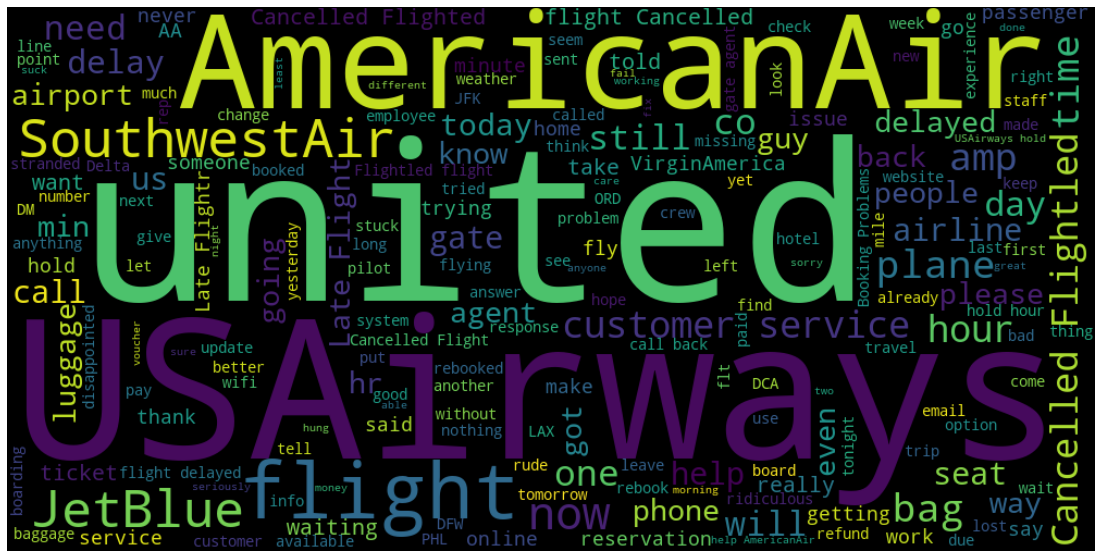

In [17]:
negstr = ""
for e in negs:
    negstr += e
    negstr += " "
    
    
counts = Counter(''.join(negstr.split(" ")))
print(counts)
    
    
    
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000, height=500).generate(negstr)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

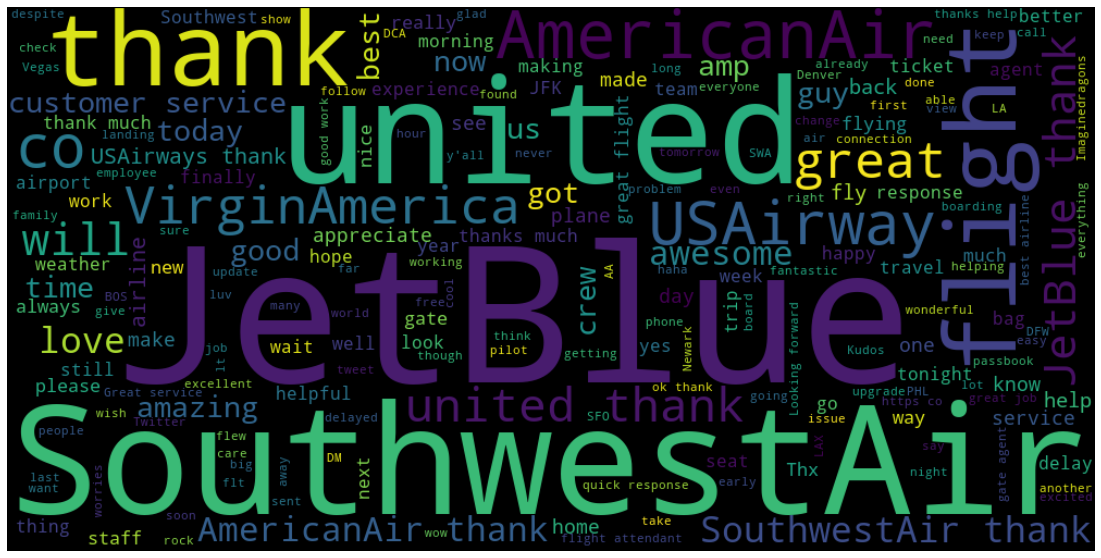

In [18]:
posstr = ""
for e in poss:
    posstr += e
    posstr += " "
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000, height=500).generate(posstr)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

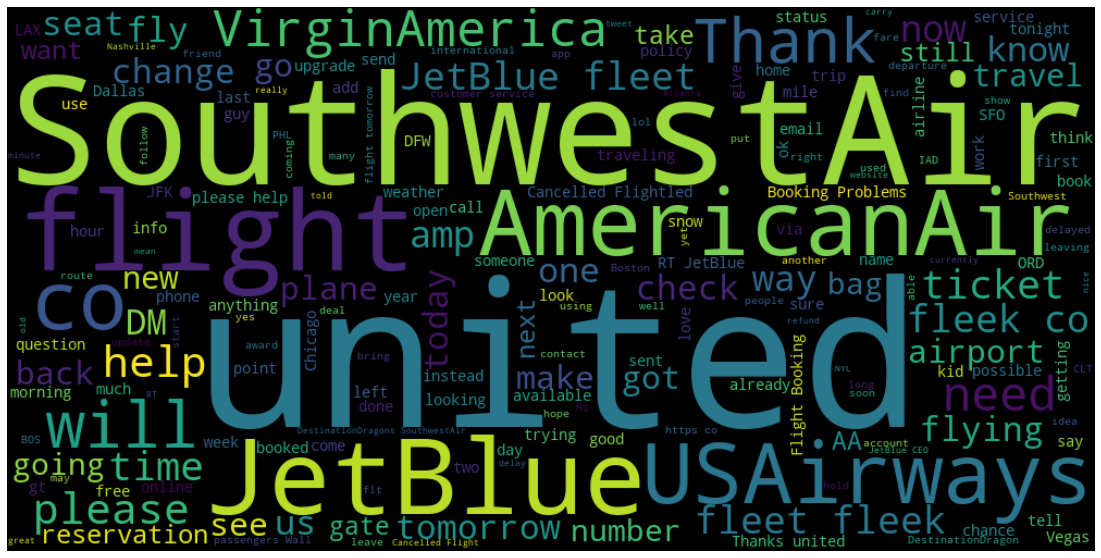

In [19]:
neusstr = ""
for e in neus:
    neusstr += e
    neusstr += " "
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000, height=500).generate(neusstr)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(airline['text'])
print(X.shape)

(14640, 15051)


# KNN tests

### KNN without any preprocessing, simple CountVectorizer

In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(airline['text'])
X_train, X_test, y_train, y_test = train_test_split(X, airline['airline_sentiment'], test_size=0.2)

def simple_knn(X_train, X_test, y_train, y_test,k=2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    return knn.score(X_test,y_test)
    
basic_acc = simple_knn(X_train, X_test, y_train, y_test)
print(basic_acc)

0.5686475409836066


### simple KNN,  testing for different k

In [22]:
def test_accuracy(k,vectorizeddf,df):
    acc = [0]*(k+1)
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(vectorizeddf, df['airline_sentiment'], test_size=0.1)
        for i in range (1,k+1):
            acc[i] += simple_knn(X_train, X_test, y_train, y_test,k=i)

    acc = [e/10 for e in acc]        

    for i in range(1,k+1):
        print(f'accuracy {acc[i]} for {i} neighbors')
    return acc

In [23]:
acc = test_accuracy(10,X,airline)

accuracy 0.5051229508196722 for 1 neighbors
accuracy 0.5795081967213114 for 2 neighbors
accuracy 0.5278688524590163 for 3 neighbors
accuracy 0.5243169398907105 for 4 neighbors
accuracy 0.5125683060109291 for 5 neighbors
accuracy 0.5088114754098361 for 6 neighbors
accuracy 0.48688524590163934 for 7 neighbors
accuracy 0.4898224043715847 for 8 neighbors
accuracy 0.473292349726776 for 9 neighbors
accuracy 0.4648224043715848 for 10 neighbors


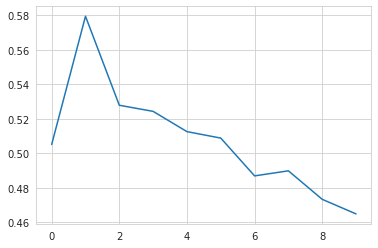

In [24]:
plt.plot(acc[1:11])
plt.show()

### KNN with balanced classes in dataset (more data)

In [92]:
#balancing classes
negs = airline[airline['airline_sentiment'] == 'negative']
poss = airline[airline['airline_sentiment'] == 'positive']
neus = airline[airline['airline_sentiment'] == 'neutral']
balanceddf = pd.concat([negs,neus,neus,neus,poss,poss,poss,poss])
balanceddf = balanceddf.reset_index()
balanceddf = balanceddf.drop(balanceddf.columns[0],axis=1)
balanceddf.head()

,airline_sentiment,text
0,negative,@VirginAmerica it's really aggressive to blast...
1,negative,@VirginAmerica and it's a really big bad thing...
2,negative,@VirginAmerica seriously would pay $30 a fligh...
3,negative,@VirginAmerica SFO-PDX schedule is still MIA.
4,negative,@VirginAmerica I flew from NYC to SFO last we...


In [91]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(balanceddf['text'])
X_train, X_test, y_train, y_test = train_test_split(X, balanceddf['airline_sentiment'], test_size=0.1)

def simple_knn(X_train, X_test, y_train, y_test,k=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    return knn.score(X_test,y_test)
    
acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')


new accuracy is 0.9760114572144647, it changed by 0.40804697634014775


accuracy 0.7920515574650913 for 1 neighbors
accuracy 0.7983172216254923 for 2 neighbors
accuracy 0.7322950232724669 for 3 neighbors


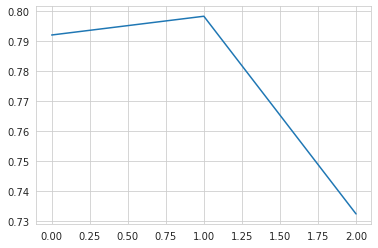

In [32]:
acc = test_accuracy(3,X,balanceddf)
plt.plot(acc[1:4])
plt.show()

### KNN with balanced classes in dataset (less data) [and different test to train ratio]

In [33]:
#making dataset smallet but balanced
balanceddf = pd.concat([poss,negs[0:2362],neus[0:2362]])
balanceddf = balanceddf.reset_index()
balanceddf = balanceddf.drop(balanceddf.columns[0],axis=1)
print(balanceddf.shape)
balanceddf.head()

(7087, 2)


,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,positive,"@VirginAmerica yes, nearly every time I fly VX..."
2,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
3,positive,"@VirginAmerica it was amazing, and arrived an ..."
4,positive,@VirginAmerica I &lt;3 pretty graphics. so muc...


In [34]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(balanceddf['text'])
X_train, X_test, y_train, y_test = train_test_split(X, balanceddf['airline_sentiment'], test_size=0.1)

    
acc = simple_knn(X_train, X_test, y_train, y_test,k=2)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

new accuracy is 0.5669957686882934, it changed by 0.06836188890687261


accuracy 0.5548660084626235 for 1 neighbors
accuracy 0.5877291960507758 for 2 neighbors
accuracy 0.5760225669957688 for 3 neighbors
accuracy 0.5702397743300424 for 4 neighbors
accuracy 0.5564174894217208 for 5 neighbors


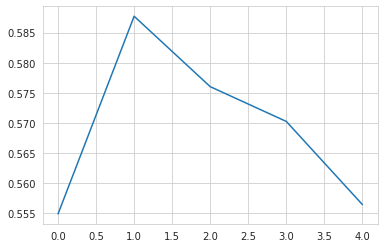

In [35]:
acc = test_accuracy(5,X,balanceddf)
plt.plot(acc[1:6])
plt.show()

### But testing data is also multiplied, so was it biased?

In [36]:
X_train, X_test, y_train, y_test = train_test_split(airline['text'], airline['airline_sentiment'], test_size=0.1)
Nairline = pd.concat([X_train, y_train], axis=1, sort=False)
Nairlinetest = pd.concat([X_test,y_test],axis=1, sort=False)
Nnegs = Nairline[Nairline['airline_sentiment'] == 'negative']
Nposs = Nairline[Nairline['airline_sentiment'] == 'positive']
Nneus = Nairline[Nairline['airline_sentiment'] == 'neutral']

In [37]:
print(f'NEGATIVES, dataframe of len {Nnegs.shape[0]}')
print('=====================================================================')
print(f'POSITIVES, dataframe of len {Nposs.shape[0]}')
print('=====================================================================')
print(f'NEUTRALS, dataframe of len {Nneus.shape[0]}')


NEGATIVES, dataframe of len 8270
POSITIVES, dataframe of len 2119
NEUTRALS, dataframe of len 2787


In [38]:
balanceddf = pd.concat([Nnegs,Nneus,Nneus,Nneus[0:1000],Nposs,Nposs,Nposs,Nposs])
balanceddf = balanceddf.reset_index()
balanceddf = balanceddf.drop(balanceddf.columns[0],axis=1)
balanceddf.head()

,text,airline_sentiment
0,@united wonderful bag claim people - finally h...,negative
1,@united $7 for wifi just so I can tell my fami...,negative
2,@SouthwestAir @ LAX is almost a mess. For some...,negative
3,@AmericanAir Thanks for the response.Tough nig...,negative
4,@united I'm on snowy roads to BWI. I Just call...,negative


In [39]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(balanceddf['text'])
Xt = vectorizer.transform(Nairlinetest['text'])
acc = simple_knn(X, Xt, balanceddf['airline_sentiment'], Nairlinetest['airline_sentiment'],k=2)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

new accuracy is 0.5703551912568307, it changed by 0.07172131147540989


Yup, got worse.

### Can we go further?


In [79]:
# here we create much more data
#balancing classes
negs = airline[airline['airline_sentiment'] == 'negative']
poss = airline[airline['airline_sentiment'] == 'positive']
neus = airline[airline['airline_sentiment'] == 'neutral']
balanceddf = pd.concat([negs,neus,neus,neus,poss,poss,poss,poss,negs,neus,neus,neus,poss,poss,poss,poss])
balanceddf = balanceddf.reset_index()
balanceddf = balanceddf.drop(balanceddf.columns[0],axis=1)
balanceddf.head()

,airline_sentiment,text
0,negative,@VirginAmerica it's really aggressive to blast...
1,negative,@VirginAmerica and it's a really big bad thing...
2,negative,@VirginAmerica seriously would pay $30 a fligh...
3,negative,@VirginAmerica SFO-PDX schedule is still MIA.
4,negative,@VirginAmerica I flew from NYC to SFO last we...


In [80]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(balanceddf['text'])
X_train, X_test, y_train, y_test = train_test_split(X, balanceddf['airline_sentiment'], test_size=0.1)

def simple_knn(X_train, X_test, y_train, y_test,k=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    return knn.score(X_test,y_test)
    
acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

new accuracy is 0.9778016469745793, it changed by 0.4791677671931585


# XD

### KNN and preprocessing with stemming for whole set

In [40]:
# preprocessing
copyair = airline.copy()
newtext = []
for tweet in copyair['text']:
    e = re.sub(r'\d+', '', tweet)
    e = e.translate(str.maketrans('', '', string.punctuation))
    stemmer= PorterStemmer()
    e=word_tokenize(e)
    newtext.append(' '.join(e))

copyair['text'] = newtext
    

In [41]:
copyair.head()

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus youve added commercials to ...
2,neutral,VirginAmerica I didnt today Must mean I need t...
3,negative,VirginAmerica its really aggressive to blast o...
4,negative,VirginAmerica and its a really big bad thing a...


In [42]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(copyair['text'])
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

new accuracy is 0.5051229508196722, it changed by 0.006489071038251415


### KNN with stemming but only training data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(airline['text'], airline['airline_sentiment'], test_size=0.2)
cairline = pd.concat([X_train, y_train], axis=1, sort=False)

In [44]:
# preprocessing
copyair = cairline.copy()
newtext = []
for tweet in copyair['text']:
    e = re.sub(r'\d+', '', tweet)
    e = e.translate(str.maketrans('', '', string.punctuation))
    stemmer= PorterStemmer()
    e=word_tokenize(e)
    newtext.append(' '.join(e))

copyair['text'] = newtext
    

In [45]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(copyair['text'])
Xt = vectorizer.transform(X_test)
acc = simple_knn(X, Xt, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

new accuracy is 0.5, it changed by 0.0013661202185792365


### KNN for checking if some airlines just are more hated online

We will remove airline names and check if accuracy is better or worse

In [87]:
copyair = airline.copy()
newtext = []
for tweet in copyair['text']:
    e = re.sub(r'\d+', '', tweet)
    newe = []
    for w in e.split():
        if w[1:].lower() in airlines or w[1:len(w)-2] in airlines:
            pass
        else:
            newe.append(w)
    e = ' '.join(newe)
    newtext.append(e)

copyair['text'] = newtext
    

In [88]:
copyair.head(20)

,airline_sentiment,text
0,neutral,What @dhepburn said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it
5,negative,seriously would pay $ a flight for seats that ...
6,positive,"yes, nearly every time I fly VX this “ear worm..."
7,neutral,Really missed a prime opportunity for Men With...
8,positive,"Well, I didn't…but NOW I DO! :-D"
9,positive,"it was amazing, and arrived an hour early. You..."


In [89]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(copyair['text'])
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

new accuracy is 0.5040983606557377, it changed by 0.0054644808743168904


### KNN but with reduced number of features

In [105]:
def test_reducedfeatures(fe):
    vectorizer = CountVectorizer(max_features=200)
    X = vectorizer.fit_transform(airline['text'])
    X_train, X_test, y_train, y_test = train_test_split(X, airline['airline_sentiment'], test_size=0.2)
    return simple_knn(X_train, X_test, y_train, y_test)

for i in range(1,30000,100):
    acc = test_reducedfeatures(i)
    accs.append(acc)
    print(f'for {i} features accuracy is {acc}')

for 1 features accuracy is 0.6161202185792349
for 101 features accuracy is 0.6260245901639344
for 201 features accuracy is 0.6086065573770492
for 301 features accuracy is 0.6168032786885246
for 401 features accuracy is 0.6198770491803278
for 501 features accuracy is 0.6239754098360656
for 601 features accuracy is 0.6065573770491803
for 701 features accuracy is 0.6256830601092896
for 801 features accuracy is 0.6092896174863388
for 901 features accuracy is 0.6065573770491803
for 1001 features accuracy is 0.6229508196721312
for 1101 features accuracy is 0.6277322404371585
for 1201 features accuracy is 0.6294398907103825
for 1301 features accuracy is 0.6140710382513661
for 1401 features accuracy is 0.6133879781420765
for 1501 features accuracy is 0.5853825136612022
for 1601 features accuracy is 0.6045081967213115
for 1701 features accuracy is 0.6239754098360656
for 1801 features accuracy is 0.6034836065573771
for 1901 features accuracy is 0.6174863387978142
for 2001 features accuracy is 0.

for 16701 features accuracy is 0.6055327868852459
for 16801 features accuracy is 0.6185109289617486
for 16901 features accuracy is 0.6014344262295082
for 17001 features accuracy is 0.6099726775956285
for 17101 features accuracy is 0.6301229508196722
for 17201 features accuracy is 0.6256830601092896
for 17301 features accuracy is 0.6157786885245902
for 17401 features accuracy is 0.6140710382513661
for 17501 features accuracy is 0.6239754098360656
for 17601 features accuracy is 0.6150956284153005
for 17701 features accuracy is 0.6068989071038251
for 17801 features accuracy is 0.6113387978142076
for 17901 features accuracy is 0.6168032786885246
for 18001 features accuracy is 0.6154371584699454
for 18101 features accuracy is 0.6222677595628415
for 18201 features accuracy is 0.6109972677595629
for 18301 features accuracy is 0.5976775956284153
for 18401 features accuracy is 0.6202185792349727
for 18501 features accuracy is 0.6140710382513661
for 18601 features accuracy is 0.6140710382513661


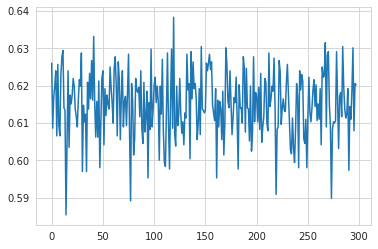

In [109]:
plt.plot(accs[1:301])
plt.show()

### KNN but we try to reduce dimensions with CountVectorizer

In [33]:
copyair = airline.copy()

In [32]:
vectorizer = CountVectorizer(stop_words='english', max_df=0.9,min_df=0.1)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(previous dimensions are (14640, 15051), now it's (14640, 6)
new accuracy is 0.5922131147540983, it changed by 0.0058060109289617134


In [35]:
vectorizer = CountVectorizer(stop_words='english',max_df=0.6,min_df=0.05)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 14)
new accuracy is 0.6308060109289617, it changed by 0.0443989071038251


In [36]:
vectorizer = CountVectorizer(stop_words='english', max_df=0.3,min_df=0.01)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 137)
new accuracy is 0.6349043715846995, it changed by 0.04849726775956287


In [37]:
vectorizer = CountVectorizer(stop_words='english',max_df=0.1,min_df=0.01)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 131)
new accuracy is 0.6588114754098361, it changed by 0.07240437158469948


In [38]:
vectorizer = CountVectorizer(stop_words='english',max_df=0.8)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 14770)
new accuracy is 0.585724043715847, it changed by -0.000683060109289646


In [42]:
vectorizer = CountVectorizer(stop_words='english',max_df=0.1)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 14764)
new accuracy is 0.6591530054644809, it changed by 0.07274590163934425


In [45]:
vectorizer = CountVectorizer(stop_words='english',min_df=0.005)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 305)
new accuracy is 0.6574453551912568, it changed by 0.07103825136612019


In [50]:
vectorizer = CountVectorizer(stop_words='english',min_df=0.001)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 1216)
new accuracy is 0.6045081967213115, it changed by 0.018101092896174897


### KNN

In [6]:
copyair = airline.copy()

In [10]:
vectorizer = CountVectorizer(max_df=0.9,min_df=0.1)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 23)
new accuracy is 0.5925546448087432, it changed by 0.02390710382513661


In [11]:
vectorizer = CountVectorizer(max_df=0.6,min_df=0.05)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 50)
new accuracy is 0.6246584699453552, it changed by 0.05601092896174864


In [12]:
vectorizer = CountVectorizer(max_df=0.3,min_df=0.01)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 248)
new accuracy is 0.608948087431694, it changed by 0.04030054644808745


In [21]:
vectorizer = CountVectorizer(max_df=0.1,min_df=0.01)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 227)
new accuracy is 0.6369535519125683, it changed by 0.06830601092896171


In [14]:
vectorizer = CountVectorizer(max_df=0.8)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 15051)
new accuracy is 0.5706967213114754, it changed by 0.002049180327868827


In [15]:
vectorizer = CountVectorizer(max_df=0.1)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 15028)
new accuracy is 0.58025956284153, it changed by 0.011612021857923427


In [16]:
vectorizer = CountVectorizer(min_df=0.005)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 448)
new accuracy is 0.6034836065573771, it changed by 0.0348360655737705


In [17]:
vectorizer = CountVectorizer(min_df=0.001)
X = vectorizer.fit_transform(copyair['text'])
print(f'(standard dimensions are (14640, 15051), now it\'s {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, copyair['airline_sentiment'], test_size=0.2)

acc = simple_knn(X_train, X_test, y_train, y_test)
print(f'new accuracy is {acc}, it changed by {acc-basic_acc}')

(standard dimensions are (14640, 15051), now it's (14640, 1421)
new accuracy is 0.5782103825136612, it changed by 0.0095628415300546


### KNN

### KNN

### KNN

### KNN

### KNN

### KNN

### KNN

### KNN

### KNN

### KNN

### KNN

### KNN